# Explanatory Data Analysis

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 📁Load Datasets

In [6]:
path_name = '../dataset/'

app_train_df = pd.read_csv(path_name + 'application_train.csv')
app_test_df = pd.read_csv(path_name + 'application_test.csv')
bureau_df = pd.read_csv(path_name + 'bureau.csv')
bureau_balance_df = pd.read_csv(path_name + 'bureau_balance.csv')
previous_app_df = pd.read_csv(path_name + 'previous_application.csv')
pos_cash_balance = pd.read_csv(path_name + 'POS_CASH_balance.csv')
installment_payment_df = pd.read_csv(path_name + 'installments_payments.csv')
credit_card_balance = pd.read_csv(path_name + 'credit_card_balance.csv')

## 📁`application_train.csv` (primary dataset for modeling)

In [7]:
app_train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
pd.options.display.max_columns = None

app_train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### 🎯 Analysis target

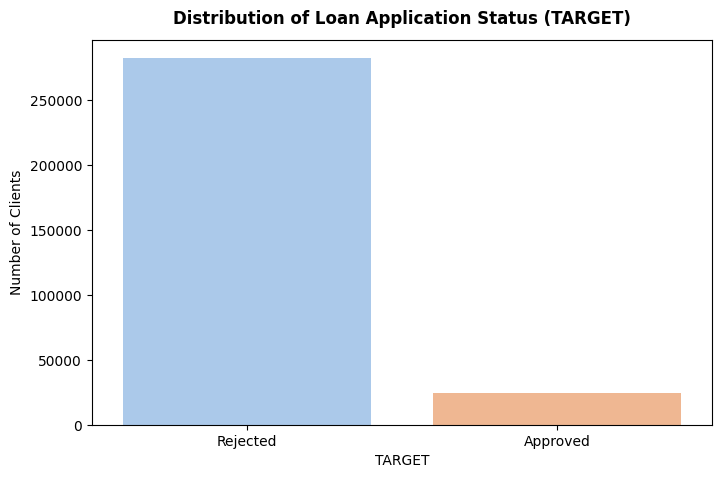


Percentage Distribution:
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [14]:
target_counts = app_train_df['TARGET'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='pastel')
plt.title('Distribution of Loan Application Status (TARGET)', fontsize=12, fontweight='bold', y=1.02)
# plt.xlabel('Loan Repayment Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Number of Clients')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.show()

target_percentage = app_train_df['TARGET'].value_counts(normalize=True) * 100
print("\nPercentage Distribution:")
print(target_percentage)

🔍Insights:
- There is significant class imbalanced with 91.93% clients' application were rejected and only 8.07% client's application were approves.

💡Action:
- Use resampling techniques (oversampling or undersampling)

### 📊Descriptive analysis (Univariate Analysis)

- Group Numerical and Categorical Features

In [ ]:
# Identify float columns with integer-like values
float_cols = app_train_df.select_dtypes(include=['float', 'int']).columns

# Filter columns where all non-null values are integers
int_like_cols = [col for col in float_cols if (app_train_df[col].dropna() % 1 == 0).all()]

print("Columns to convert to integer:", int_like_cols)

Columns to convert to integer: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FL

In [50]:
numerical_columns = app_train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in int_like_cols]

categorical_columns = int_like_cols + app_train_df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns.remove('SK_ID_CURR')

print("Numerical Columns:", numerical_columns)
print("\nCategorical Columns:", categorical_columns)

Numerical Columns: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_ME

In [57]:
# convert incompatible datatypes
app_train_df['CNT_FAM_MEMBERS'] = app_train_df['CNT_FAM_MEMBERS'].fillna(0).astype('int32')
app_train_df['AMT_REQ_CREDIT_BUREAU_MON'] = app_train_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0).astype('int64')
app_train_df['AMT_REQ_CREDIT_BUREAU_WEEK'] = app_train_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0).astype('int64')
app_train_df['AMT_REQ_CREDIT_BUREAU_QRT'] = app_train_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0).astype('int64')
app_train_df['AMT_REQ_CREDIT_BUREAU_YEAR'] = app_train_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0).astype('int64')
app_train_df['OBS_30_CNT_SOCIAL_CIRCLE'] = app_train_df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')
app_train_df['OBS_60_CNT_SOCIAL_CIRCLE'] = app_train_df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')
app_train_df['DEF_30_CNT_SOCIAL_CIRCLE'] = app_train_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')
app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'] = app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')
app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'] = app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')
app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'] = app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')
app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'] = app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')
app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'] = app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')

# remove period-based features
period_features = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE']

for i in period_features:
    if i in categorical_columns:
        categorical_columns.remove(i)

- Summary Statistics

In [72]:
# Detect outliers using IQR method
Q1 = app_train_df[numerical_columns].quantile(0.25)
Q3 = app_train_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers_IQR = ((app_train_df[numerical_columns] < (Q1 - 1.5 * IQR)) | (app_train_df[numerical_columns] > (Q3 + 1.5 * IQR)))

outliers_count_IQR = outliers_IQR.sum()

outliers_percentage = (outliers_count_IQR / app_train_df.shape[0]) * 100

num_desc_stats = app_train_df[numerical_columns].describe().transpose()

# Add additional statistics
num_desc_stats['skewness'] = app_train_df[numerical_columns].skew()
num_desc_stats['kurtosis'] = app_train_df[numerical_columns].kurtosis()
num_desc_stats['variance'] = app_train_df[numerical_columns].var()
#num_desc_stats['outlier_count'] = outliers_count_IQR
num_desc_stats['outliers (%)'] = outliers_percentage

num_desc_stats.head(5)


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,variance,outliers (%)
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08,391.559654,191786.554381,5.622739e+10,4.564064
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06,1.234778,1.934041,1.619988e+11,2.133907
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05,1.579777,7.707320,2.100684e+08,2.440238
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06,1.349000,2.431916,1.364907e+11,4.789422
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02,1.488009,3.260065,1.913043e-04,2.735512


In [53]:
# Define skewness thresholds
right_skewed_cols = num_desc_stats[num_desc_stats['skewness'] > 1].index.tolist()
left_skewed_cols = num_desc_stats[num_desc_stats['skewness'] < -1].index.tolist()

# Define low variance threshold
low_variance_cols = num_desc_stats[num_desc_stats['variance'] < 0.01].index.tolist()

# Display results
print("Right-skewed features:", right_skewed_cols)
print("Left-skewed features:", left_skewed_cols)
print("Low variance features:", low_variance_cols)

Right-skewed features: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Left-skewed features: ['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'YEARS_BEGINEXPLUATATION_MEDI']
Low variance features: ['REGION_POPULATION_RELATIVE', 'BASEME

🔍Insights:
- Right-skewed:
- Left-skewed:
- Low variance: `REGION_POPULATION_RELATIVE`, `BASEMENTAREA_AVG`, `YEARS_BEGINEXPLUATATION_AVG`, `COMMONAREA_AVG`, `LANDAREA_AVG`, `LIVINGAPARTMENTS_AVG`, `NONLIVINGAPARTMENTS_AVG`, `NONLIVINGAREA_AVG`, `BASEMENTAREA_MODE`, `YEARS_BEGINEXPLUATATION_MODE`, `COMMONAREA_MODE`, `LANDAREA_MODE`, `LIVINGAPARTMENTS_MODE`, `NONLIVINGAPARTMENTS_MODE`, `NONLIVINGAREA_MODE`, `BASEMENTAREA_MEDI`, `YEARS_BEGINEXPLUATATION_MEDI`, `COMMONAREA_MEDI`, `LANDAREA_MEDI`, `LIVINGAPARTMENTS_MEDI`, `NONLIVINGAPARTMENTS_MEDI`, `NONLIVINGAREA_MEDI`

💡Actions:
- Remove outliers using winsorization
- Do standardization and normalization
- Drop features with low variance

- Distribution Plot Numerical Features (KDE)

c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

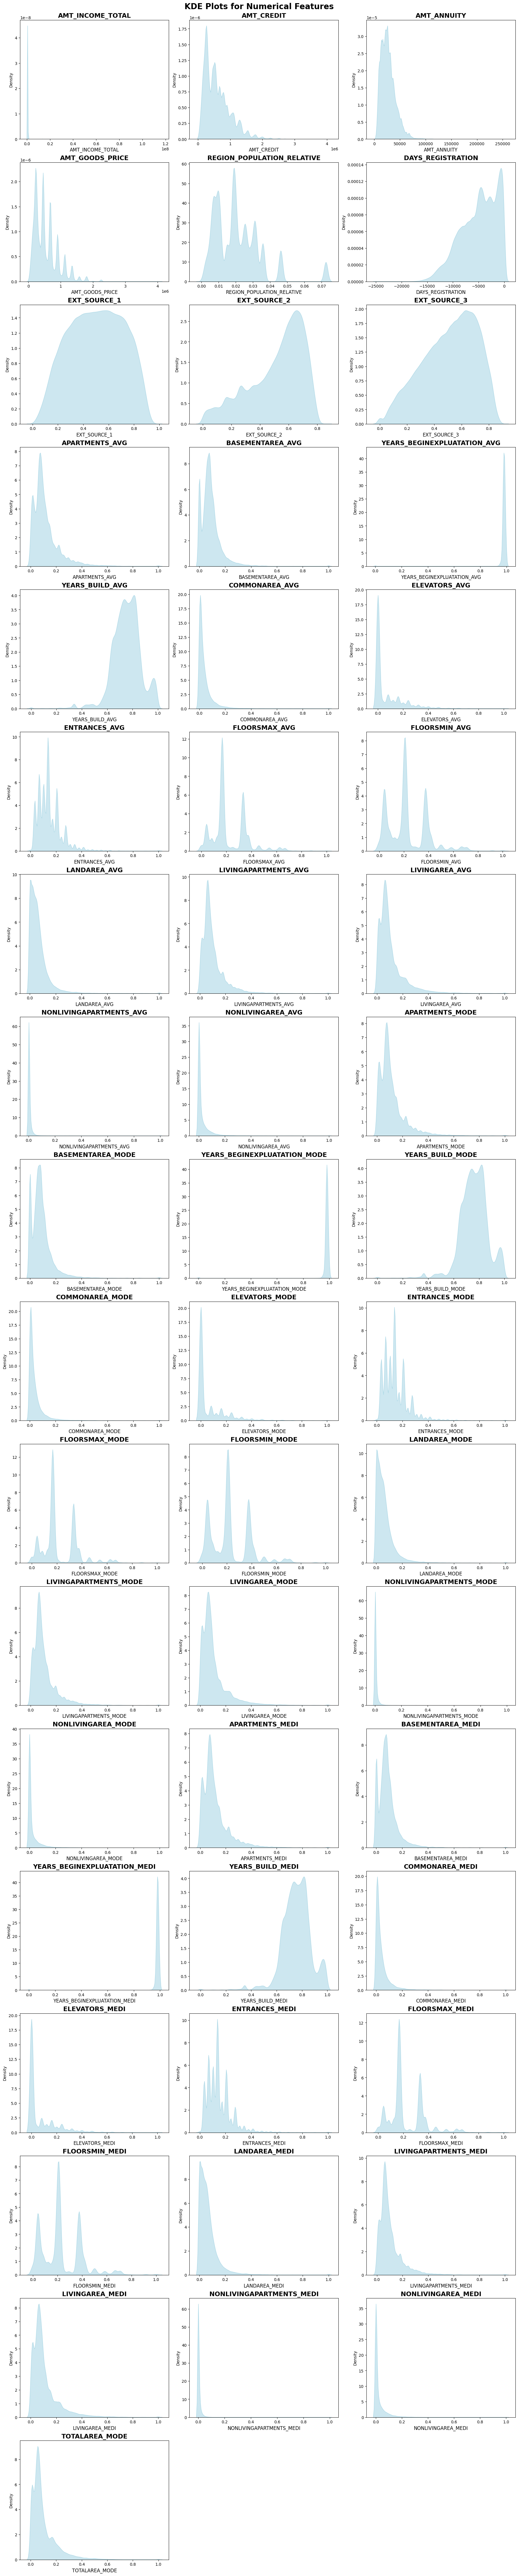

In [40]:
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("KDE Plots for Numerical Features", fontsize=20, fontweight='bold')
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=app_train_df, x=col, ax=axes[i], fill=True, color="lightblue", alpha=0.6)
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

- Distribution Plot Categorical Features

C:\Users\fizuf\AppData\Local\Temp\ipykernel_20024\2207015338.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


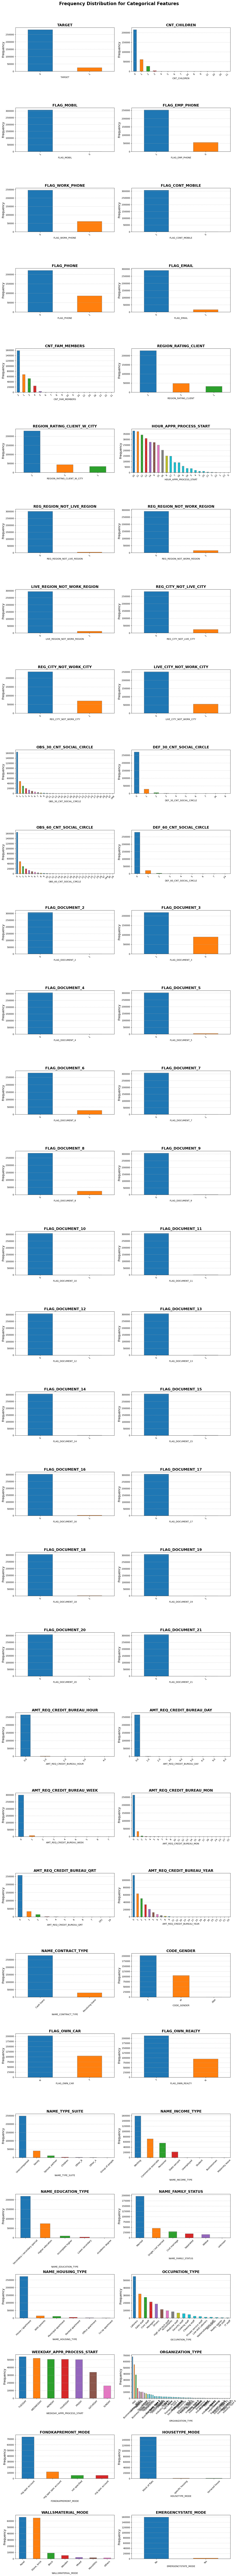

In [ ]:
num_rows = (len(categorical_columns) + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows), constrained_layout=True)

fig.suptitle("Frequency Distribution for Categorical Features", fontsize=20, fontweight='bold', y=1.001)

for i, column in enumerate(categorical_columns):
    row, col = divmod(i, 2) 
    ax = axes[row, col]
    
    value_counts = app_train_df[column].value_counts()
    colors = plt.cm.tab10(range(len(value_counts)))
    
    value_counts.plot(kind="bar", ax=ax, color=colors, edgecolor="grey")
    
    ax.set_title(f"{column}", fontsize=16, fontweight='bold')
    ax.set_ylabel("Frequency", fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', labelrotation=45)

for j in range(len(categorical_columns), num_rows * 2):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

🔍Insights:
- Features with high cardinality: `FLAG_MOBIL`, `FLAG_CONT_MOBILE`, `FLAG_EMAIL`, `REG_REGION_NOT_LIVE_REGION`, `REG_REGION_NOT_WORK_REGION`, `LIVE_REGION_NOT_WORK_REGION`, `REGION_CITY_NOT_LIVE_CITY`, `FLAG_DOCUMENT_2`, `FLAG_DOCUMENT_4`, `FLAG_DOCUMENT_7`, `FLAG_DOCUMENT_9`, `FLAG_DOCUMENT_10`, `FLAG_DOCUMENT_11`, `FLAG_DOCUMENT_12`, `FLAG_DOCUMENT_13`, `FLAG_DOCUMENT_14`, `FLAG_DOCUMENT_15`, `FLAG_DOCUMENT_16`, `FLAG_DOCUMENT_17`, `FLAG_DOCUMENT_18`, `FLAG_DOCUMENT_19`, `FLAG_DOCUMENT_20`, `FLAG_DOCUMENT_21`, `AMT_REQ_CREDIT_BUREAU_WEEK`, `AMT_REQ_CREDIT_BUREAU_MON`, `AMT_REQ_CREDIT_BUREAU_QRT`, `AMT_REQ_CREDIT_BUREAU_YEAR`, `HOUSETYPE_MODE`, `EMERGENCYSTATE_MODE`

💡Actions:
- Drop features with high cardinality

### 📈Correlation Analysis (Bivariate analysis)

In [74]:
low_variance_feats = ['REGION_POPULATION_RELATIVE', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'COMMONAREA_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI']
selected_features = []

for i in numerical_columns:
    if i not in low_variance_cols:
        selected_features.append(i)

print(f'selected features:{selected_features}')

selected features:['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'YEARS_BUILD_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'YEARS_BUILD_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LIVINGAREA_MODE', 'APARTMENTS_MEDI', 'YEARS_BUILD_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAREA_MEDI', 'TOTALAREA_MODE']


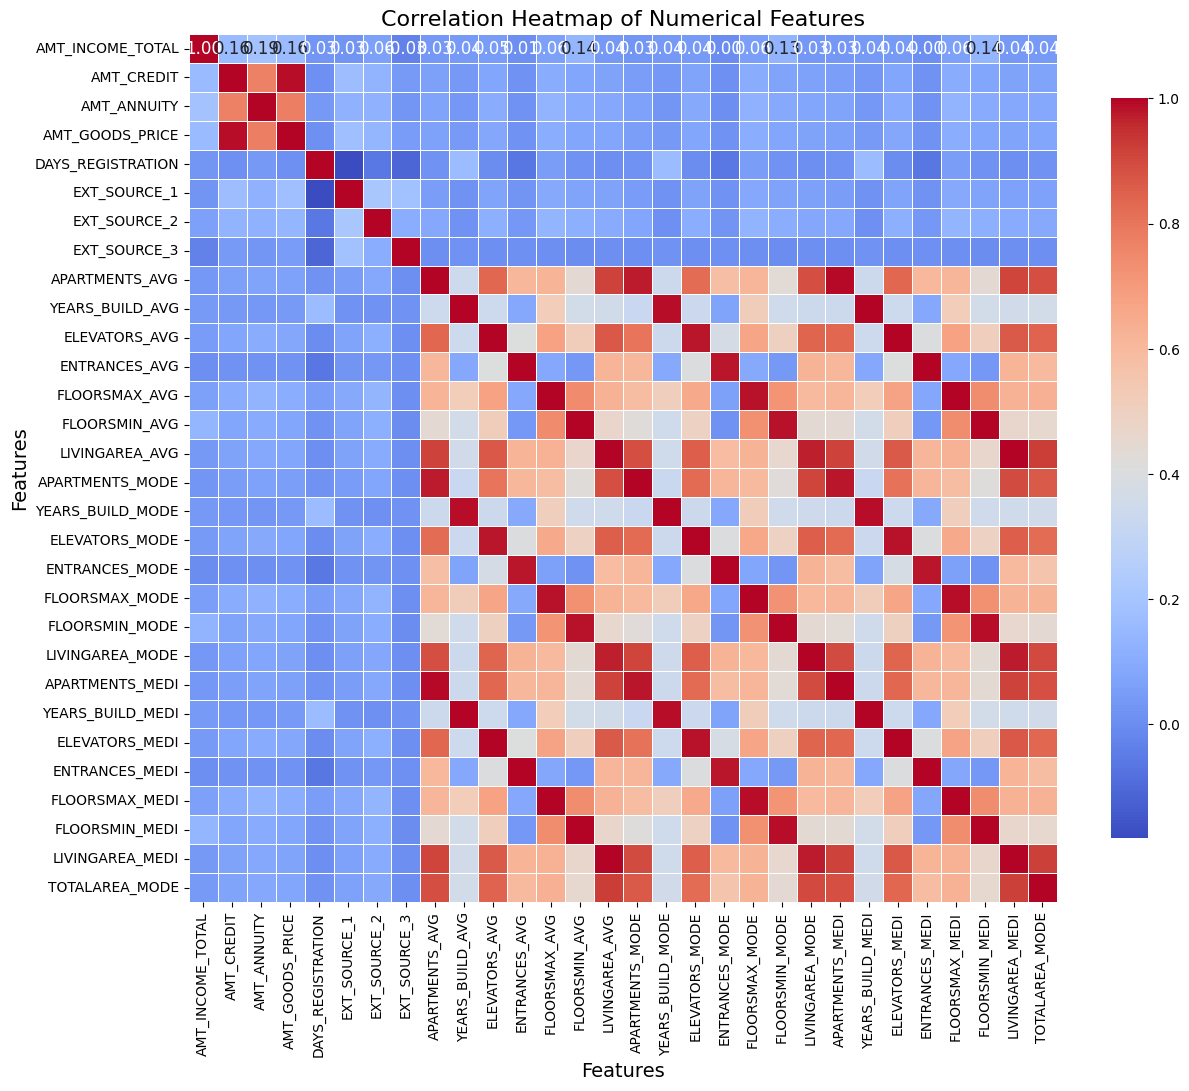

In [75]:
correlation_matrix = app_train_df[selected_features].corr()

correlation_matrix = correlation_matrix[selected_features].fillna(0)

plt.figure(figsize=(14, 12)) 
sns.heatmap(
    correlation_matrix, 
    annot=True,            
    cmap='coolwarm',       
    fmt=".2f",             
    annot_kws={'size': 12},  
    cbar_kws={'shrink': 0.8},  
    linewidths=0.5,        
    square=True,           
    xticklabels=correlation_matrix.columns,  
    yticklabels=correlation_matrix.index,   
    cbar=True
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.show()

🔍Insights:
- High correlation features: (`AMT_GOOD_PRICE`, `AMT_CREDIT`), (`AMT_CREDIT`, `AMT_ANNUITY`), (`AMT_GOOD_PRICE`, `AMT_ANNUITY`), (`ELEVATOR_AVG`, `APARTMENTS_AVG`), (`LIVINGAREA_AVG`, `APARTMENTS_AVG`), (`ELEVATOR_MODE`, `APARTMENTS_AVG`), (`LIVINGAREA_MODE`, `APARTMENTS_AVG`), (`LIVINGAREA_MEDI`, `APARTMENTS_AVG`), (`TOTALAREA_MODE`, `APARTMENTS_AVG`), (`LIVINGAREA_AVG`, `ELEVATORS_AVG`), (`YEARS_BUILD_MODE`, `ELEVATORS_AVG`)

💡Actions:
- Select one feature among high correlation features.
- Create new features by combining several high correlated features.

## 📁`bureau.csv` and `bureau_balance.csv`

In [77]:
bureau_df.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [79]:
bureau_df.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [78]:
bureau_balance_df.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


### Merge dataset

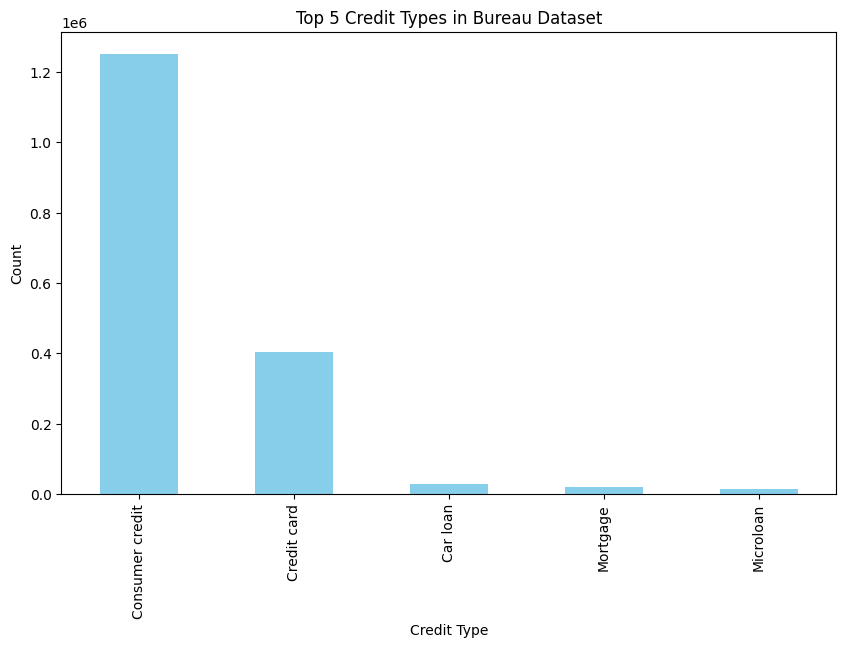

In [91]:
# Top 5 Credit Types
plt.figure(figsize=(10, 6))
credit_type_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Credit Types in Bureau Dataset')
plt.xlabel('Credit Type')
plt.ylabel('Count')
plt.show()

C:\Users\fizuf\AppData\Local\Temp\ipykernel_20024\2549258896.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_overdue = bureau_df.groupby('CREDIT_DURATION')['AMT_CREDIT_SUM_OVERDUE'].mean().reset_index()
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


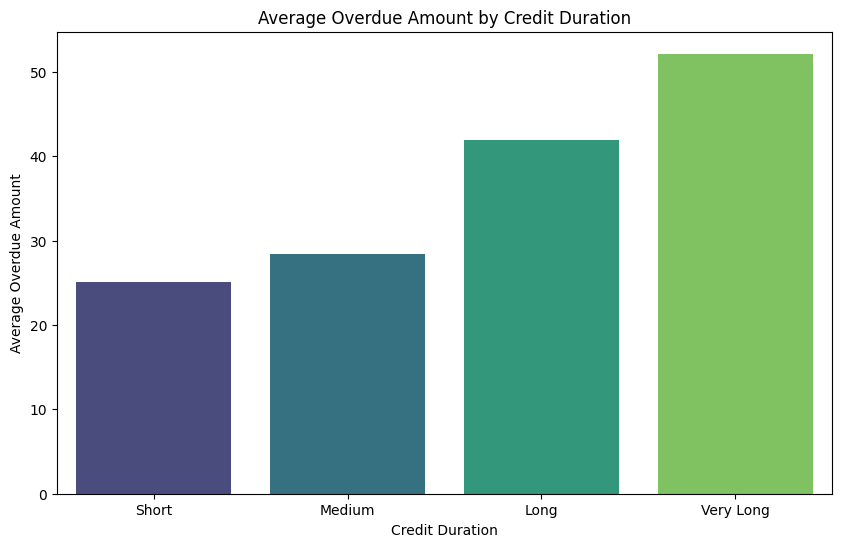

In [94]:
bureau_df = bureau_df.copy()
bureau_df['DAYS_CREDIT_ENDDATE'].replace(365243, np.nan, inplace=True)  # Handle placeholder value

# Create a duration category
bureau_df['CREDIT_DURATION'] = pd.qcut(bureau_df['DAYS_CREDIT_ENDDATE'].dropna(), q=4, labels=['Short', 'Medium', 'Long', 'Very Long'])

# Calculate average overdue amount per duration category
duration_overdue = bureau_df.groupby('CREDIT_DURATION')['AMT_CREDIT_SUM_OVERDUE'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=duration_overdue, x='CREDIT_DURATION', y='AMT_CREDIT_SUM_OVERDUE', palette='viridis')
plt.title('Average Overdue Amount by Credit Duration')
plt.xlabel('Credit Duration')
plt.ylabel('Average Overdue Amount')
plt.show()

🔍Insights:
- Longer credit duration showed higher overdue amounts, indicating risk.

🧠Reasoning:
- Longer-duration loans might create financial strain over time, increasing the likelihood of missed payments.
- Borrowers may face unforeseen financial difficulties during extended repayment periods.

💡Actions
- **Stricter Risk Assessment for Long-Term Loans**: Introduce more stringent creditworthiness checks for applicants seeking long-term loans.
- **Dynamic Credit Limits**: Consider implementing dynamic repayment structures, like higher initial payments or balloon payments toward the end.
- **Periodic Financial Health Checks**: Regularly assess the borrower’s financial health during the loan tenure to detect early warning signs of default.
- **Offer Financial Planning Support**: Provide resources or consultations to help borrowers plan long-term repayments effectively.

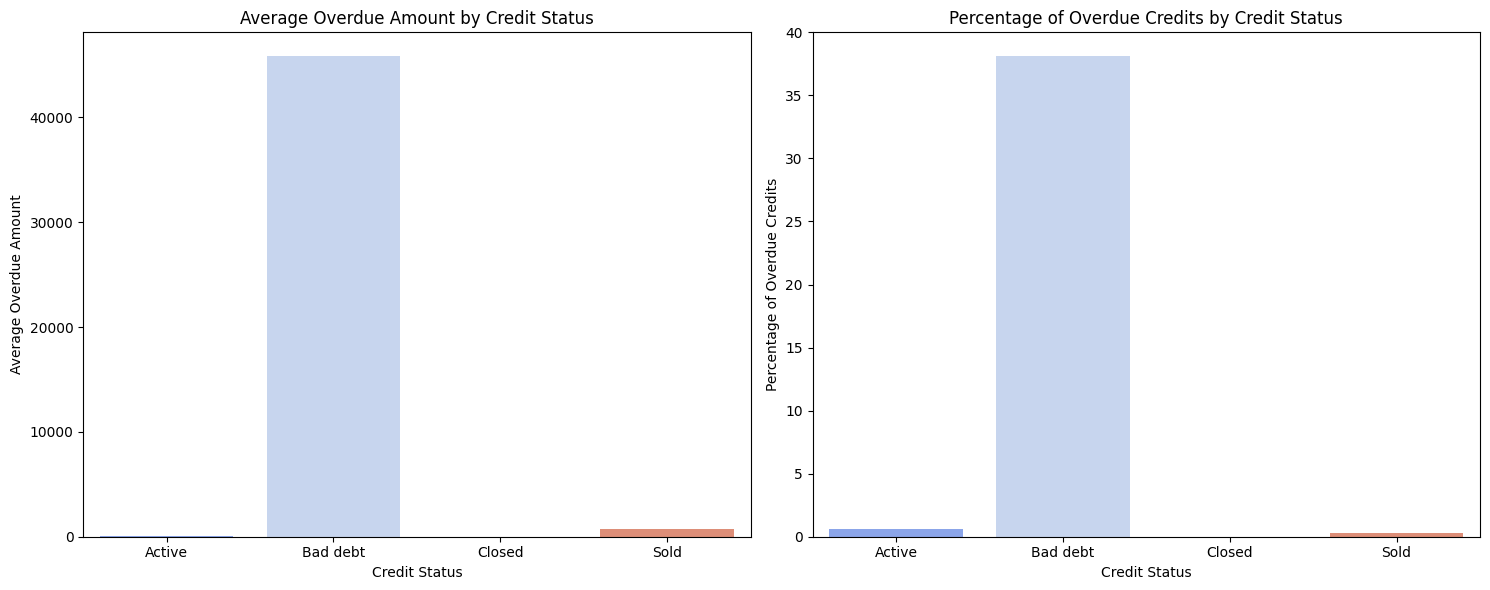

In [95]:
# Aggregate overdue information by CREDIT_ACTIVE status
credit_active_overdue = bureau_df.groupby('CREDIT_ACTIVE').agg(
    Total_Overdue=('AMT_CREDIT_SUM_OVERDUE', 'sum'),
    Avg_Overdue=('AMT_CREDIT_SUM_OVERDUE', 'mean'),
    Overdue_Count=('AMT_CREDIT_SUM_OVERDUE', lambda x: (x > 0).sum()),
    Total_Credits=('SK_ID_BUREAU', 'count')
).reset_index()

# Calculate percentage of overdue credits
credit_active_overdue['Overdue_Percentage'] = (credit_active_overdue['Overdue_Count'] / credit_active_overdue['Total_Credits']) * 100

# Visualization: Average Overdue Amount by Credit Status
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Avg Overdue Amount
sns.barplot(data=credit_active_overdue, x='CREDIT_ACTIVE', y='Avg_Overdue', palette='coolwarm', ax=ax[0])
ax[0].set_title('Average Overdue Amount by Credit Status')
ax[0].set_xlabel('Credit Status')
ax[0].set_ylabel('Average Overdue Amount')

# Overdue Percentage
sns.barplot(data=credit_active_overdue, x='CREDIT_ACTIVE', y='Overdue_Percentage', palette='coolwarm', ax=ax[1])
ax[1].set_title('Percentage of Overdue Credits by Credit Status')
ax[1].set_xlabel('Credit Status')
ax[1].set_ylabel('Percentage of Overdue Credits')

plt.tight_layout()
plt.show()

🔍Insights:
- Bad debt significantly has high percentage of overdue credit among other credit status (active, closed, sold).

🧠Reasoning:
- Bad debts suggest loans where repayment is unlikely, and this group may already include non-performing assets.
- These accounts might have systemic issues, such as insufficient initial risk assessment or poorly structured repayment plans.

💡Actions:
- **Early Intervention Programs**: Proactively monitor signs of overdue payments and engage borrowers early to prevent defaults.
- **Restructure Loan Terms for At-Risk Accounts**: Offer renegotiated repayment terms to reduce overdue risk.
- **Focus on Active Loan Management**: Shift resources to actively monitor and manage at-risk borrowers before they fall into bad debt.
- **Limit Credit Access to High-Risk Borrowers**: Implement tighter credit controls for applicants with a history of overdue debts.

## 📁`previous_application.csv`

## 📁`POS_CASH_balance.csv`, `instalment_payments.csv`, `credit_card_balance.csv`